## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

**Generate and numerically represent a confidence interval**

In [0]:
import pandas as pd

url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

votes_df = pd.read_csv(url_data, header=None, na_values='?')

In [224]:
votes_df.columns = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
votes_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [225]:
votes_df = votes_df.replace({'y':1, 'n':0})
votes_df.head

<bound method NDFrame.head of           party  handicapped-infants  ...  duty-free  south-africa
0    republican                  0.0  ...        0.0           1.0
1    republican                  0.0  ...        0.0           NaN
2      democrat                  NaN  ...        0.0           0.0
3      democrat                  0.0  ...        0.0           1.0
4      democrat                  1.0  ...        1.0           1.0
..          ...                  ...  ...        ...           ...
430  republican                  0.0  ...        0.0           1.0
431    democrat                  0.0  ...        0.0           1.0
432  republican                  0.0  ...        0.0           1.0
433  republican                  0.0  ...        0.0           1.0
434  republican                  0.0  ...        NaN           0.0

[435 rows x 17 columns]>

In [0]:
test_votes = pd.DataFrame(votes_df['immigration']).dropna(how='any')

In [227]:
print(len(votes_df['immigration']))
print(votes_df['immigration'].isnull().sum())
print(len(test_votes['immigration']))
print(test_votes['immigration'].isnull().sum())

435
7
428
0


In [0]:
import numpy as np

In [0]:
# sample size
n = len(test_votes['immigration'])
# degrees of freedom
dof = n-1
# mean of means
big_mean = np.mean(test_votes['immigration'])
# sample standard deviation
sample_std = np.std(test_votes['immigration'], ddof=1)
# standard error
std_error = sample_std/n**.5

In [0]:
from scipy.stats import t

In [244]:
CI = t.interval(0.95, dof, loc=big_mean, scale=std_error)
CI

(0.4571155174657166, 0.5522302769268066)

In [232]:
big_mean

0.5046728971962616

In [233]:
moe

0.02419563918515006

**Graphically (with a plot) represent the confidence interval**

In [0]:
import seaborn as sea
from matplotlib import pyplot as plt

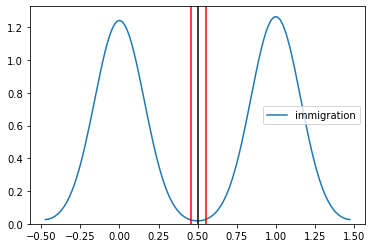

In [243]:
sea.kdeplot(test_votes['immigration'])
plt.axvline(x=CI[0], color='r')
plt.axvline(x=CI[1], color='r')
plt.axvline(x=big_mean, color='k');

**Interpret the confidence interval - what does it tell you about the data and its distribution?**

Approximately 50.4% of Americans support the immigration program with a margin of error of +/- 2.4%.

We are 95% confident that the true mean of American support for the immigration program is inbetween 45.7% and 55.2%.

**By hand using Numpy: Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data**

In [284]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult_df = pd.read_csv(url, header=None, na_values=' ?')
adult_df.head()
adult_subset = adult_df.loc[:,[1,8]]
adult_subset.columns = ['Workclass', 'Race']
adult_subset.head()

,Workclass,Race
0,State-gov,White
1,Self-emp-not-inc,White
2,Private,White
3,Private,Black
4,Private,Black


In [287]:
xtable = pd.crosstab(adult_subset['Race'], adult_subset['Workclass'], margins=True)
xtable

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Race,,,,,,,,,
Amer-Indian-Eskimo,19,36,0,190,2,24,15,0,286
Asian-Pac-Islander,44,39,0,713,46,73,58,1,974
Black,169,288,2,2176,23,93,159,1,2911
Other,7,10,0,213,5,9,4,0,248
White,721,1720,5,19404,1040,2342,1062,12,26306
All,960,2093,7,22696,1116,2541,1298,14,30725


In [0]:
# Expected Value Calculation

row_sums = xtable.iloc[0:5, 8].values
col_sums = xtable.iloc[5, 0:8].values
total = xtable.loc['All', 'All']

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_value = column*row_sums[i] / total
    expected_row.append(expected_value)
  expected.append(expected_row)

expected = np.array(expected)

In [0]:
observed = pd.crosstab(adult_subset['Race'], adult_subset['Workclass']).values

In [311]:
chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

398.88211999882253

In [313]:
dof = ((len(row_sums)-1)*(len(col_sums)-1))
dof

28

**In a single line using Scipy: Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data**

In [0]:
from scipy.stats import chi2_contingency

In [328]:
chi2_contingency(observed)

(398.88211999882253,
 3.282991576584682e-67,
 28,
 array([[8.93604557e+00, 1.94824410e+01, 6.51586656e-02, 2.11263011e+02,
         1.03881530e+01, 2.36525956e+01, 1.20822783e+01, 1.30317331e-01],
        [3.04325468e+01, 6.63492921e+01, 2.21903987e-01, 7.19476127e+02,
         3.53778356e+01, 8.05511473e+01, 4.11473393e+01, 4.43807974e-01],
        [9.09539463e+01, 1.98298552e+02, 6.63205858e-01, 2.15030288e+03,
         1.05733963e+02, 2.40743727e+02, 1.22977315e+02, 1.32641172e+00],
        [7.74873881e+00, 1.68938649e+01, 5.65012205e-02, 1.83193100e+02,
         9.00790887e+00, 2.05099430e+01, 1.04769406e+01, 1.13002441e-01],
        [8.21928723e+02, 1.79197585e+03, 5.99323027e+00, 1.94317649e+04,
         9.55492140e+02, 2.17554259e+03, 1.11131613e+03, 1.19864605e+01]]))

We reject the null hypothesis and conclude there is a statistically significant difference in occupation status amongst Americans of different races.